In [1]:
from scripts.subscripts.SYNCLUS import SYNCLUS
import numpy as np

from matplotlib import rcParams

rcParams.update({
    "text.usetex": True,
    "font.size": 16
})

In [2]:
PTEX_dissim = np.loadtxt("./data/PTEX_DTW_matrix.dat", dtype= np.float64, delimiter = ",")

In [3]:
from scripts.ClusterMetrics import silhouette_score_precomputed, calinski_harabasz_score_precomputed, davies_bouldin_score_precomputed

def GetClusteringMetrics(dissim, Labels):
    SH_score = silhouette_score_precomputed(dissim, Labels)
    CH_score = calinski_harabasz_score_precomputed(dissim, Labels)
    DB_score = davies_bouldin_score_precomputed(dissim, Labels)

    return (SH_score, CH_score, DB_score)

In [4]:
from matplotlib.pyplot import subplots, show

def VisualizeClusterMetrics(metrics_by_num):
    Figure, Subplot = subplots(3, 1, sharex="all", figsize = (7, 7))
    Figure.suptitle("SYNCLUS metrics")

    num_clusters = tuple(metrics_by_num.keys())
    SC, CH, DB = zip(*tuple(metrics_by_num.values()))

    maximum_SC_coeff = np.argmax(SC)
    maximum_CH_index = np.argmax(CH)
    minimum_DB_index = np.argmin(DB)
    print("Number of clusters given by maximum SC score: ", num_clusters[maximum_SC_coeff])
    print("Number of clusters given by maximum CH score: ", num_clusters[maximum_CH_index])
    print("Number of clusters given by minimum CH score: ", num_clusters[minimum_DB_index])

    Subplot[0].plot(num_clusters, SC, "-o")
    Subplot[1].plot(num_clusters, CH, "-o")
    Subplot[2].plot(num_clusters, DB, "-o")

    Subplot[2].set_xlabel("No. of clusters")
    Subplot[0].set_ylabel("Silhouette Coefficient")
    Subplot[1].set_ylabel("Calinski-Harabasz Index")
    Subplot[2].set_ylabel("Davies-Bouldin Index")

    Figure.tight_layout()

    show()

In [5]:
metrics_by_clusters = dict()
num_iters = 250
num_reps = 50
num_clusters = tuple(range(2, 11))

for k in num_clusters:
    SYNCLUS_VTEC = SYNCLUS(PTEX_dissim, K = k, iter = num_iters, reps = num_reps)
    Labels = SYNCLUS_VTEC.fit_predict()["end_clusters"]
    Metrics = GetClusteringMetrics(PTEX_dissim, Labels)

    metrics_by_clusters[k] = Metrics

100%|██████████| 50/50 [00:15<00:00,  3.25it/s]


Best SYNCLUS at  8 with  2  clusters
Min, Quartiles, Max
210135.27, 238198.42, 398049.18, 468028.22, 527730.3


100%|██████████| 50/50 [00:20<00:00,  2.40it/s]


Best SYNCLUS at  7 with  3  clusters
Min, Quartiles, Max
116662.19, 195358.53, 201750.84, 284135.98, 473232.49


100%|██████████| 50/50 [00:34<00:00,  1.45it/s]


Best SYNCLUS at  27 with  4  clusters
Min, Quartiles, Max
103842.46, 105578.15, 186654.81, 201759.43, 343764.96


100%|██████████| 50/50 [01:01<00:00,  1.23s/it]


Best SYNCLUS at  2 with  5  clusters
Min, Quartiles, Max
93119.74, 93922.77, 101480.34, 135827.77, 231327.85


100%|██████████| 50/50 [01:25<00:00,  1.72s/it]


Best SYNCLUS at  4 with  6  clusters
Min, Quartiles, Max
83622.61, 89404.61, 91087.05, 103437.47, 232706.11


100%|██████████| 50/50 [01:29<00:00,  1.80s/it]


Best SYNCLUS at  19 with  7  clusters
Min, Quartiles, Max
79021.12, 81680.06, 88745.19, 99891.34, 195013.04


100%|██████████| 50/50 [01:24<00:00,  1.69s/it]


Best SYNCLUS at  2 with  8  clusters
Min, Quartiles, Max
76105.54, 82743.45, 90590.05, 99098.16, 192285.11


100%|██████████| 50/50 [01:33<00:00,  1.86s/it]


Best SYNCLUS at  30 with  9  clusters
Min, Quartiles, Max
72264.01, 75736.73, 81162.42, 93933.76, 193444.25


100%|██████████| 50/50 [01:50<00:00,  2.21s/it]


Best SYNCLUS at  38 with  10  clusters
Min, Quartiles, Max
68007.73, 73142.3, 75311.73, 85665.89, 156539.55


Number of clusters given by maximum SC score:  3
Number of clusters given by maximum CH score:  2
Number of clusters given by minimum CH score:  2


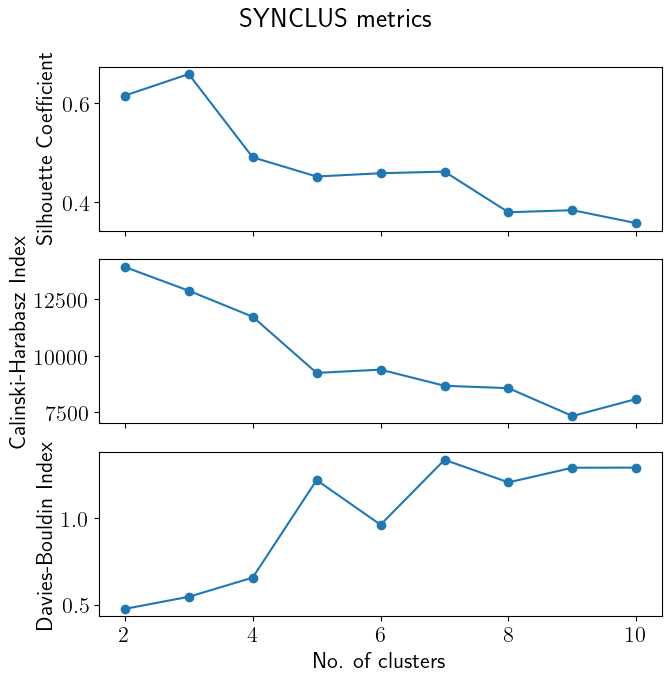

In [ ]:
VisualizeClusterMetrics(metrics_by_clusters)

In [7]:
BestLabelsSYNCLUS = SYNCLUS(PTEX_dissim, K = 3, iter = num_iters, reps = num_reps).fit_predict()["end_clusters"]

np.savetxt("./data/PTEX_SYNCLUS_Labels.dat", BestLabelsSYNCLUS.reshape(BestLabelsSYNCLUS.size, 1), fmt = "%d")

100%|██████████| 50/50 [00:19<00:00,  2.58it/s]

Best SYNCLUS at  33 with  3  clusters
Min, Quartiles, Max
116662.19, 198094.07, 207374.93, 289132.91, 512158.81
